In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-dark-palette')

data = pd.DataFrame.from_csv('truth.csv')
data = data.apply(pd.to_numeric, errors='coerce')

In [2]:
kinematics = pd.DataFrame()
kinematics['Px'] = data.Px
kinematics['Py'] = data.Py
kinematics['Pz'] = data.Pz
kinematics['E'] = data.E
kinematics['X'] = data.X
kinematics['Y'] = data.Y
kinematics['Z'] = data.Z
kinematics['T'] = data['T']
kinematics['Pt'] = np.sqrt(data.Px**2 + data.Py**2)
kinematics['P'] = np.sqrt(kinematics.Pt**2 + data.Pz**2)
kinematics['mass'] = np.sqrt(data.E**2 - kinematics.P**2)
#kinematics['PP'] = np.sqrt(data.Px**2 + data.Py**2 + data.Pz**2)

In [3]:
kinematics.head()

,Px,Py,Pz,E,X,Y,Z,T,Pt,P,mass
part,,,,,,,,,,,
0,0.1760,0.0000,4.4988,11.5028,0.3619,0.0787,-1.3131,-0.2107,0.176000,4.502241,10.585095
1,0.4054,-0.1093,2.4376,5.8299,0.3619,0.0787,-1.3131,-0.2107,0.419876,2.473497,5.279161
2,-0.2294,0.1093,2.0612,5.6729,0.3619,0.0787,-1.3131,-0.2107,0.254108,2.076804,5.279079
3,2.0084,-1.4483,1.7238,3.1843,0.4060,0.0668,-1.0481,0.4233,2.476135,3.017073,1.018350
4,-1.6030,1.3390,0.7138,2.6456,0.4060,0.0668,-1.0481,0.4233,2.088667,2.207270,1.458478


In [4]:
#ax = scatter_matrix(kinematics, alpha=0.2, figsize=(20, 15),diagonal='kde')

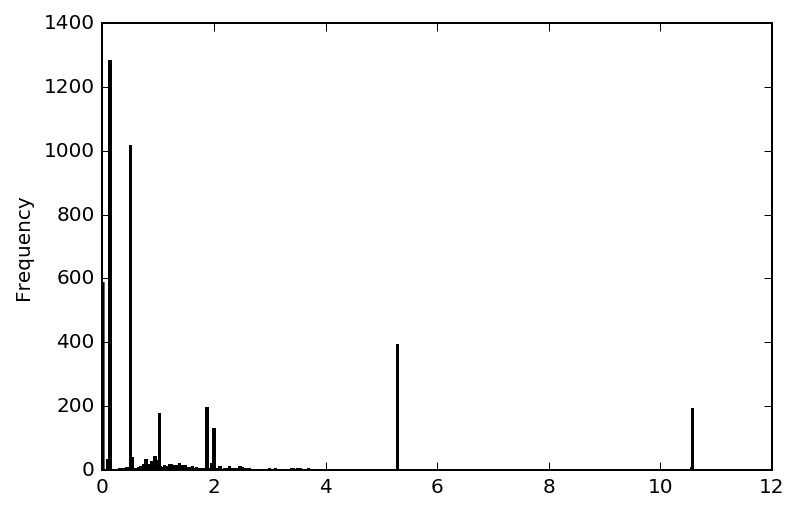

In [5]:
kinematics['mass'].plot.hist(bins=500)

In [6]:
data.drop(['i1','i2','i3'],inplace=True,axis=1)

In [7]:
data.head(32)
data.tail()

,event,ID,mother,daughter1,daughter2,Px,Py,Pz,E,X,Y,Z,T
part,,,,,,,,,,,,,
5304,19,22,14,-1,-1,0.0388,0.0885,0.0303,0.1013,0.5133,0.0732,2.3916,0.6209
5305,20,-311,10,22,22,0.0591,0.2181,-0.1819,0.5760,0.5149,0.0749,2.3803,0.6074
5306,21,-211,10,-1,-1,-0.3250,-0.0642,-0.2763,0.4534,0.5149,0.0749,2.3803,0.6074
5307,22,310,20,38,39,0.0591,0.2181,-0.1819,0.5760,0.5149,0.0749,2.3803,0.6074
5308,23,310,11,40,41,0.8057,0.6181,-0.2336,1.1547,0.5149,0.0749,2.3803,0.6074


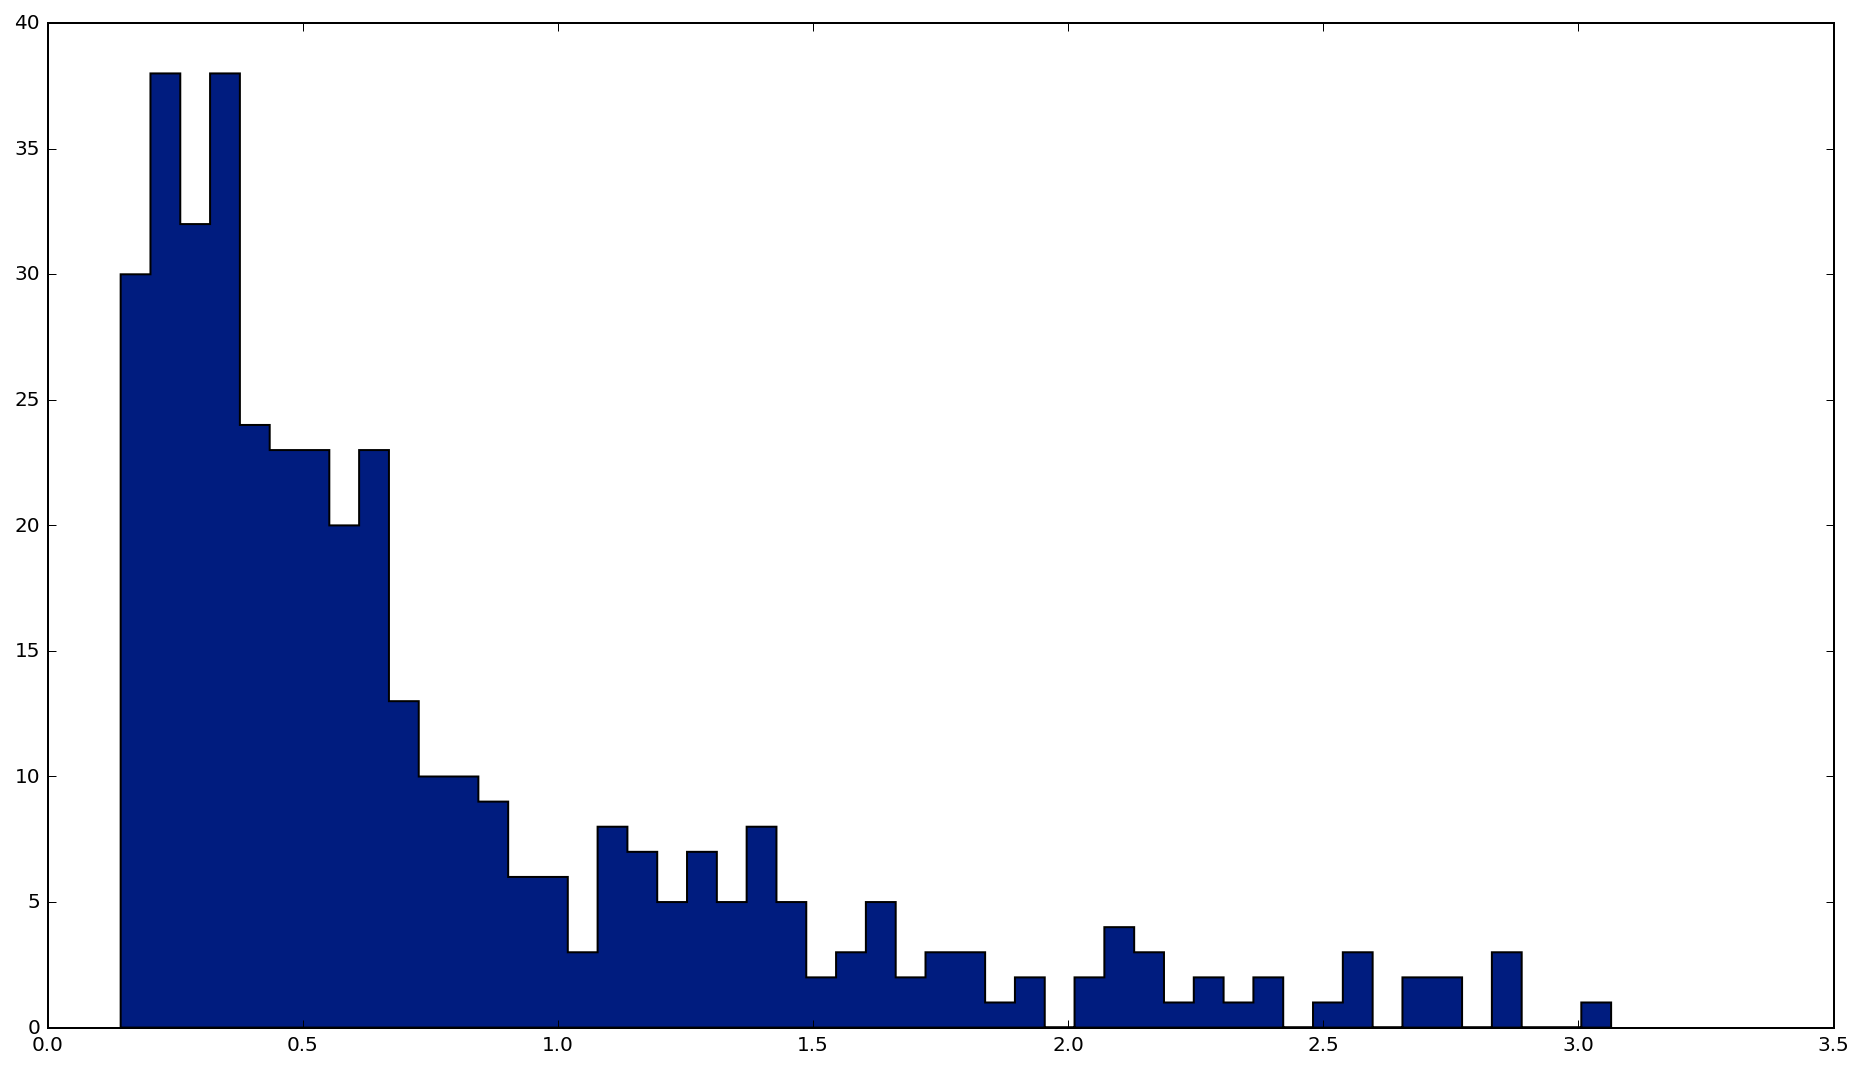

In [8]:
pi_energy = []
fig = plt.figure(figsize=(16,9))
for index, row in data.iterrows():
    if row.ID == 211:
        pi_energy.append(row.E)

pi_energy = np.array(pi_energy)
ax = plt.hist(pi_energy,bins=50,histtype='stepfilled')

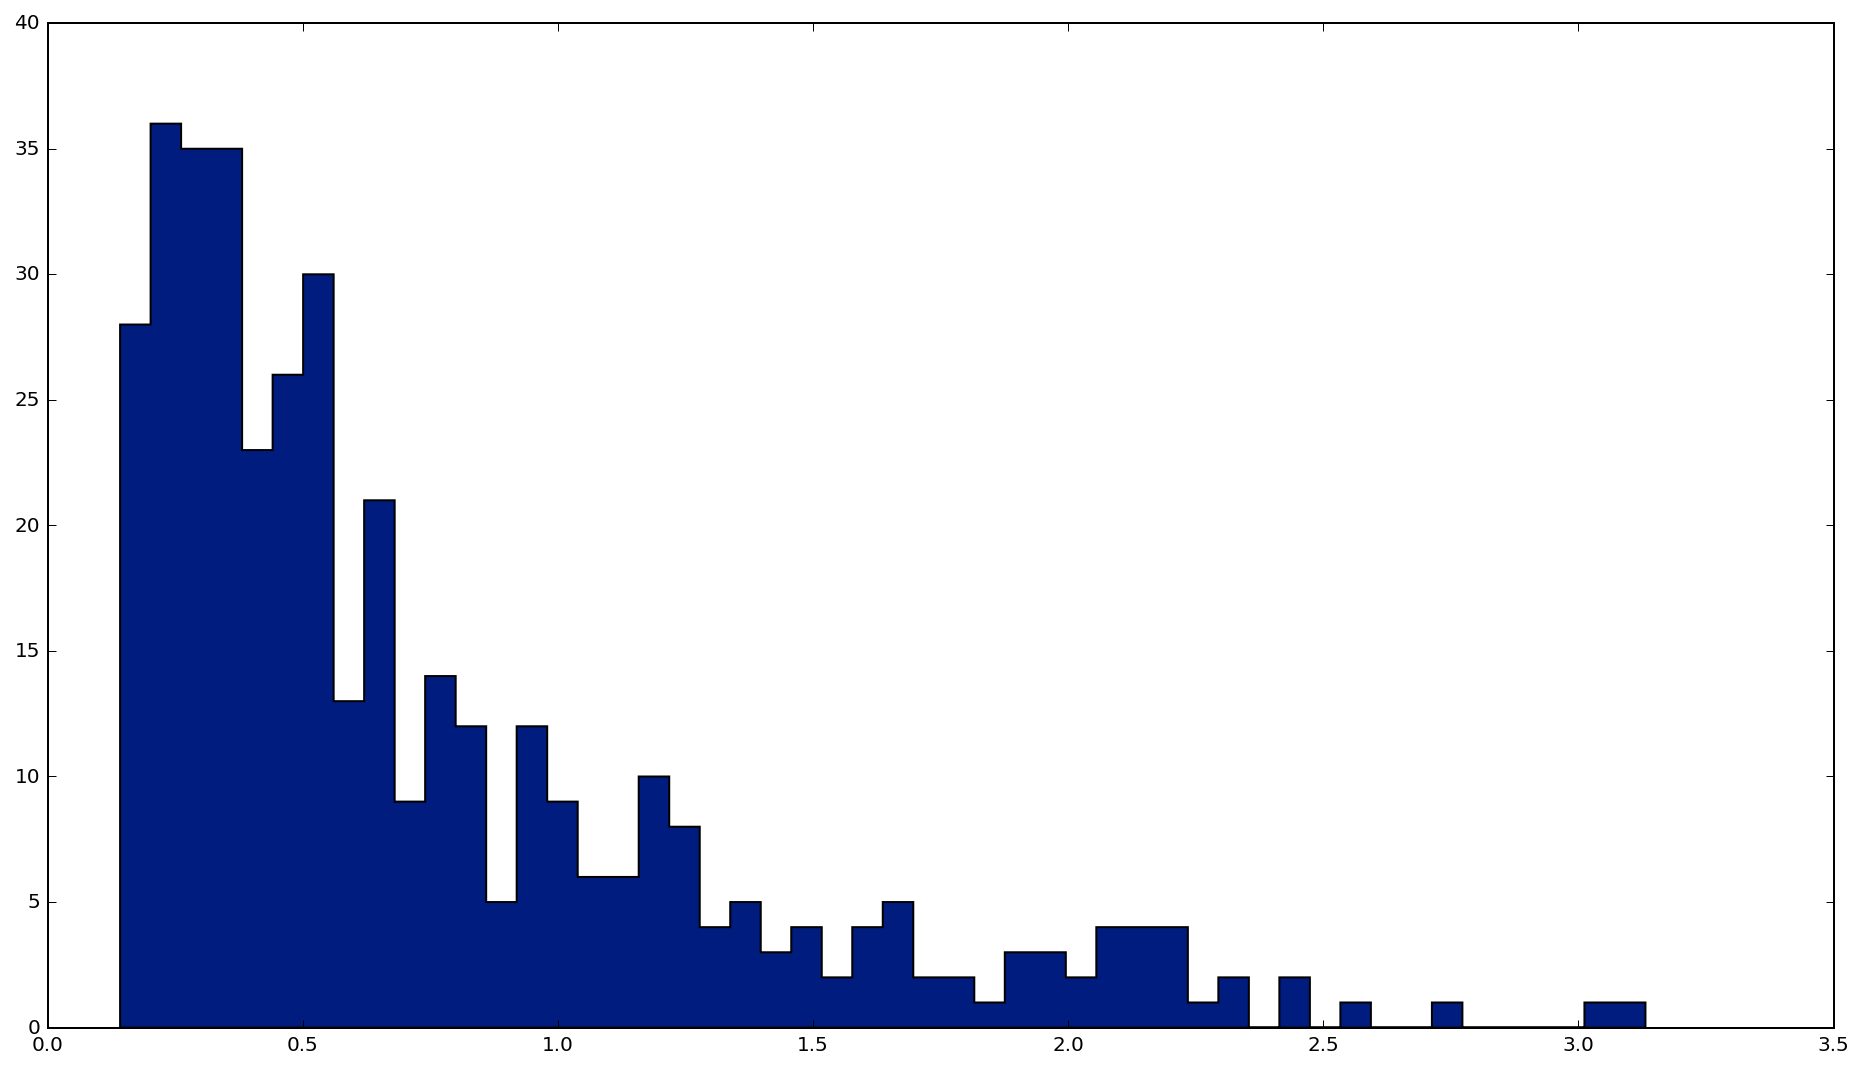

In [9]:
pi_energy = []
fig = plt.figure(figsize=(16,9))
for index, row in data.iterrows():
    if row.ID == -211:
        pi_energy.append(row.E)

pi_energy = np.array(pi_energy)
ax = plt.hist(pi_energy,bins=50,histtype='stepfilled')

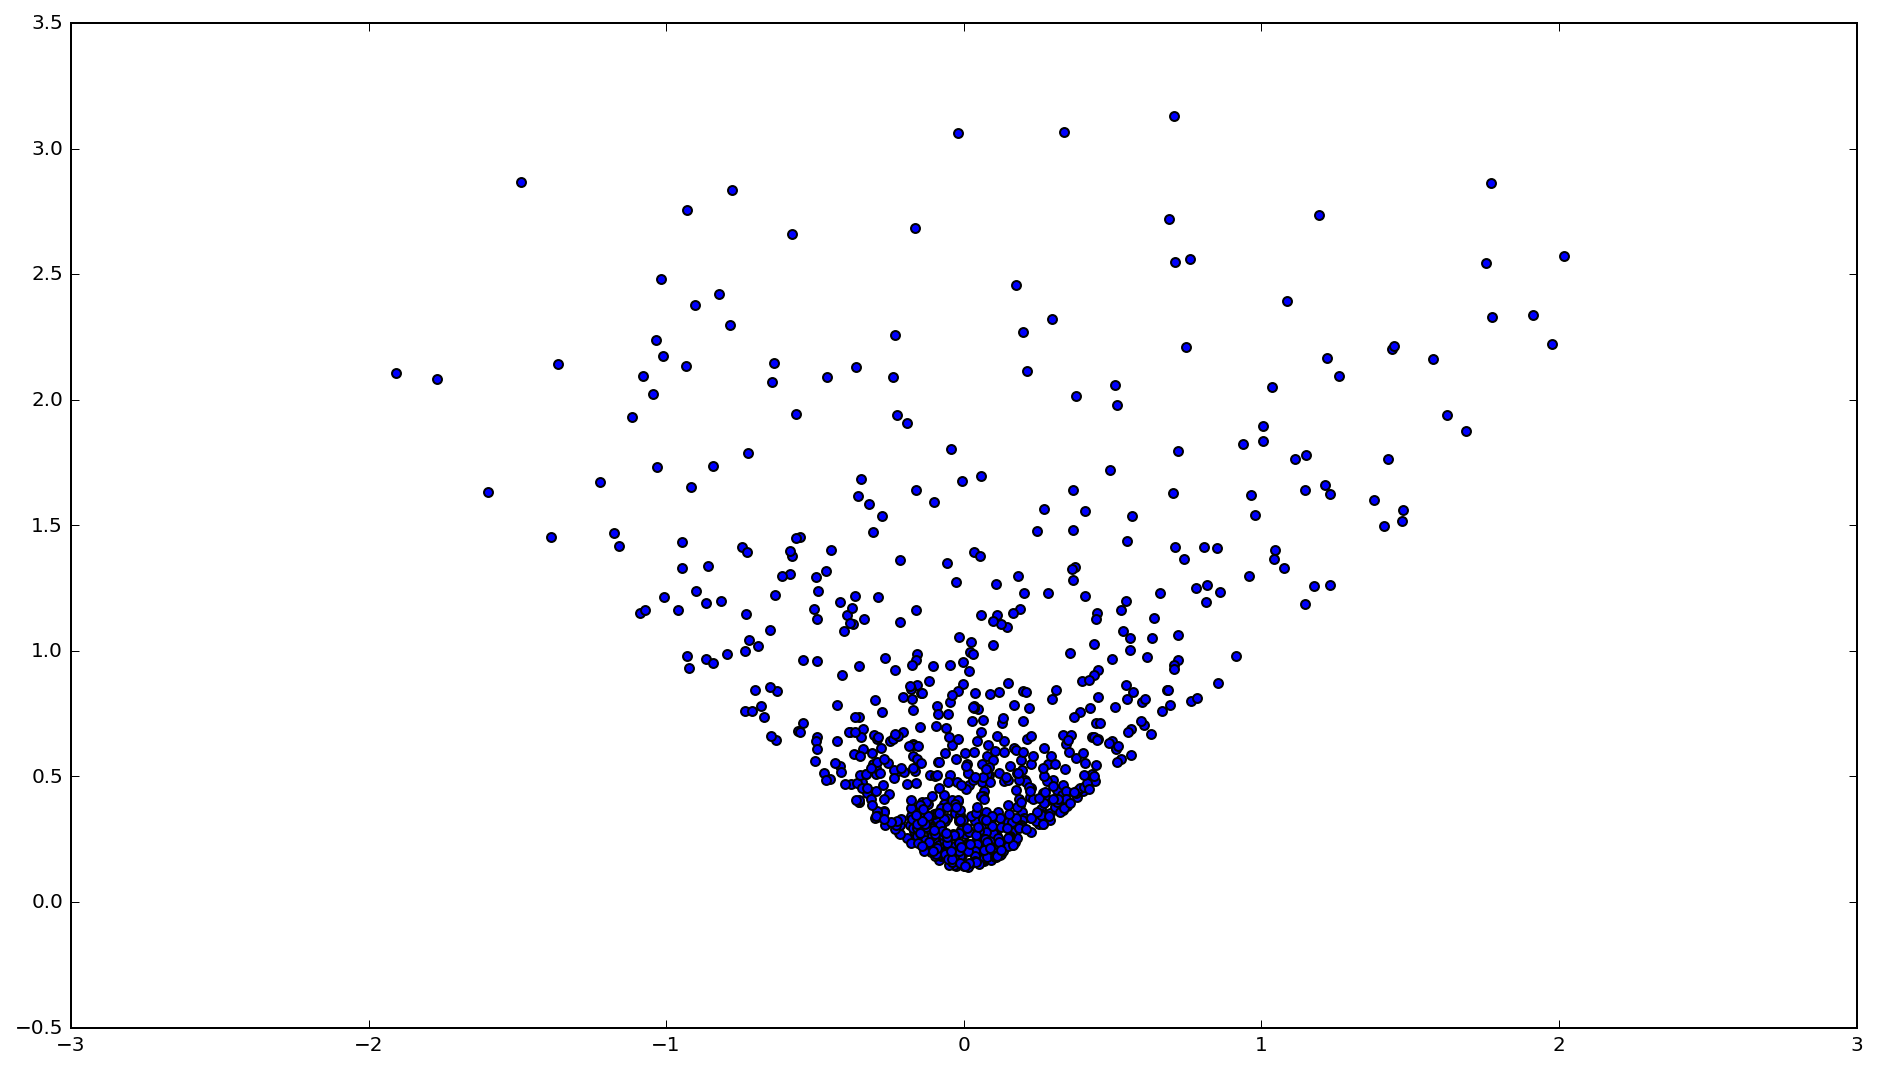

In [10]:
pi_px = []
pi_energy = []
fig = plt.figure(figsize=(16,9))

for index, row in data.iterrows():
    if np.abs(row.ID) == 211:
        pi_px.append(row.Px)
        pi_energy.append(row.E)
        

pi_px = np.array(pi_px)
pi_energy = np.array(pi_energy)

ax = plt.scatter(pi_px,pi_energy)

In [11]:
pions = data[np.abs(data.ID) == 211]
pions['P'] = pions.Px**2 + pions.Py**2 + pions.Pz**2
pions.head()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,event,ID,mother,daughter1,daughter2,Px,Py,Pz,E,X,Y,Z,T,P
part,,,,,,,,,,,,,,
8,8,211,4,40,43,0.0664,0.6113,0.3558,0.7240,0.4060,0.0668,-1.0481,0.4233,0.504690
15,15,211,9,44,44,-0.0053,-0.1188,0.0424,0.1882,0.3309,0.0930,-1.0224,0.5797,0.015939
16,16,-211,9,-1,-1,0.0619,-0.1730,0.5005,0.5511,0.3309,0.0930,-1.0224,0.5797,0.284261
24,24,-211,19,-1,-1,-0.1735,0.2882,0.0289,0.3653,0.2056,0.2287,-0.8738,1.3519,0.113997
30,30,211,12,56,57,0.2278,0.3669,-0.0052,0.4539,0.3306,0.0936,-1.0315,0.5644,0.186535


In [12]:
#ax = pions['E'].plot.kde(figsize=(16,9))
#ax = pions['P'].plot.kde(figsize=(16,9))
#ax = pions['E'].plot.hist(figsize=(16,9),bins=80)
#ax = pions['P'].plot.hist(figsize=(16,9),bins=80)

In [13]:
event_start = []
for index, row in data.iterrows():
    if row.mother == -1:
        event_start.append(index)

#print event_start

event_end = []
for index, row in data.iterrows():
    if row.mother == -1:
        if index != 1:
            event_end.append(index-1)

#print event_end

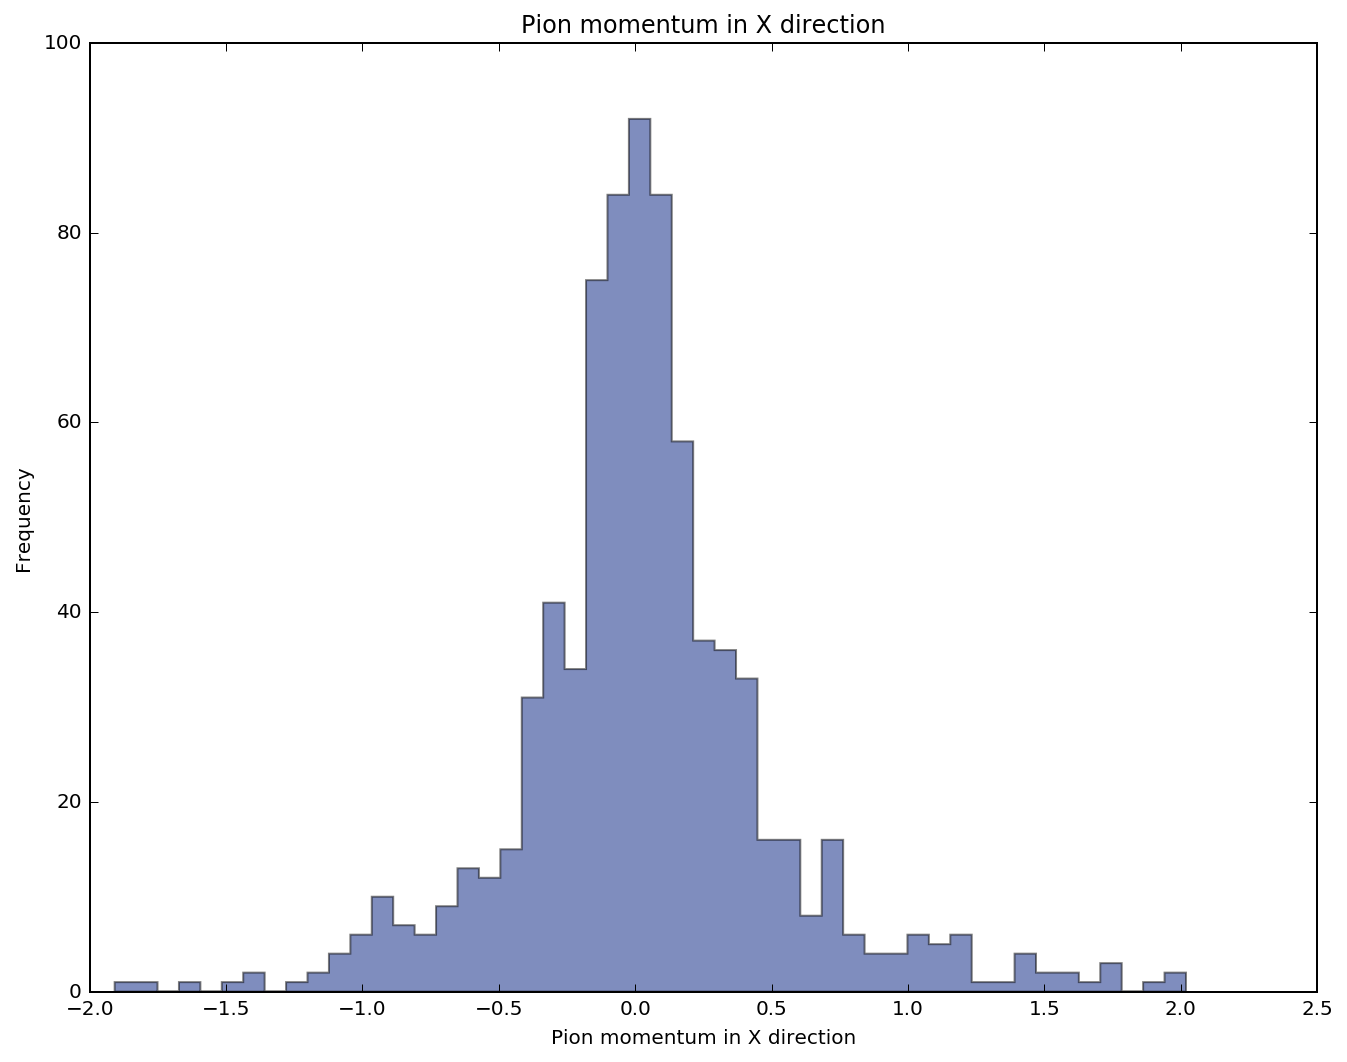

In [14]:
ax = pions.Px.plot.hist(figsize=(11,8.5),bins=50,alpha=0.5,histtype='stepfilled')
ax.set_xlabel('Pion momentum in X direction')
ax.set_title('Pion momentum in X direction')
plt.show()

AttributeError: max must be larger than min in range parameter.

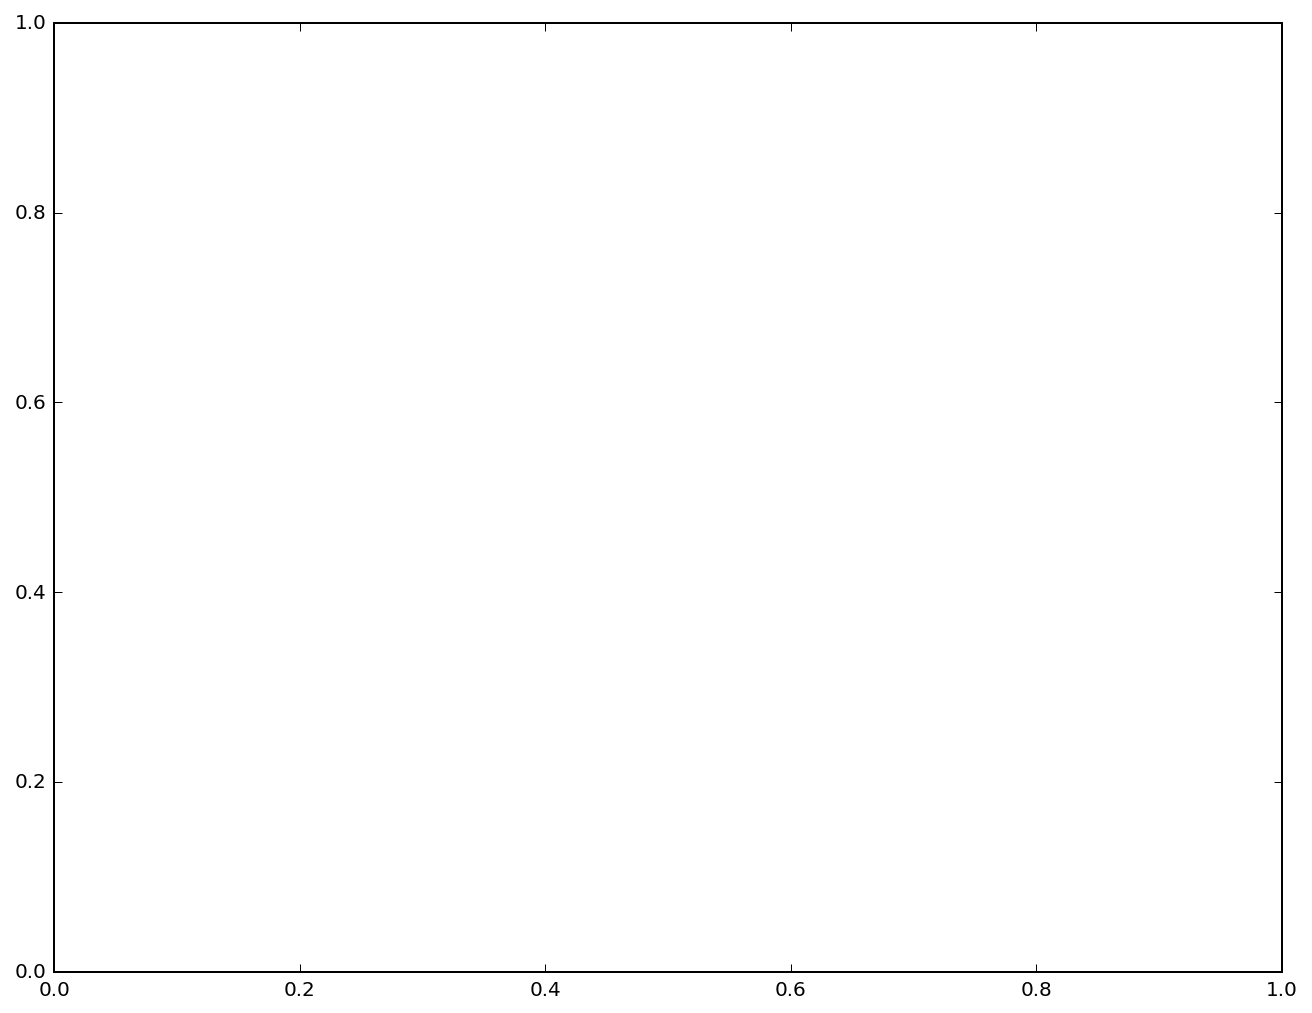

In [15]:
fig = plt.figure(figsize=(11,8.5))
num_of_events = np.hstack(data['event'][event_end])
plt.hist(num_of_events,alpha=0.5,histtype='stepfilled')
plt.ylabel('Frequency')
plt.xlabel('Number of particles')
plt.title("Number of particles per event")
plt.show()

In [ ]:
pions['mass'] = np.sqrt(pions.E**2 - (pions.Px**2 + pions.Py**2 + pions.Pz**2))
pions['mass'].plot.hist(figsize=(11,8.5),bins=50,alpha=0.5,histtype='stepfilled')

In [18]:
data.tail(65)

,event,ID,mother,daughter1,daughter2,Px,Py,Pz,E,X,Y,Z,T
part,,,,,,,,,,,,,
5244,1,521,0,3,7,0.0826,-0.2692,2.0778,5.6803,0.7356,0.0707,2.9582,0.5023
5245,2,-521,0,36,37,0.0933,0.2692,2.4197,5.8142,0.7356,0.0707,2.9582,0.5023
5246,3,-423,1,8,9,-0.6167,-1.3791,0.8643,2.6565,0.7500,0.0236,3.3215,1.4956
5247,4,213,1,16,17,0.1744,0.3541,0.5880,1.0940,0.7500,0.0236,3.3215,1.4956
5248,5,223,1,20,22,0.4184,0.4853,0.4081,1.1112,0.7500,0.0236,3.3215,1.4956
5249,6,221,1,25,27,0.1290,0.3074,0.1367,0.6555,0.7500,0.0236,3.3215,1.4956
5250,7,111,1,34,35,-0.0225,-0.0369,0.0807,0.1631,0.7500,0.0236,3.3215,1.4956
5251,8,-421,3,10,13,-0.5339,-1.2943,0.7892,2.4618,0.7500,0.0236,3.3215,1.4956
5252,9,111,3,14,15,-0.0827,-0.0848,0.0751,0.1947,0.7500,0.0236,3.3215,1.4956
